<a href="https://colab.research.google.com/github/VrashmanyuSingh/FraudRadar/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("transaction_data_100K_full.csv")
df.head()

,EVENT_LABEL,EVENT_TIMESTAMP,LABEL_TIMESTAMP,EVENT_ID,ENTITY_TYPE,ENTITY_ID,card_bin,customer_name,billing_street,billing_city,...,billing_country,customer_job,ip_address,customer_email,billing_phone,user_agent,product_category,order_price,payment_currency,merchant
0,0,2023-02-14T02:27:41Z,2023-02-14T02:27:41Z,100005a527cbcd5de0c4c878288912017,customer,634-80-3034,259703,Ricky,8247 Christopher Mountains Apt. 462,Paint Lick,...,US,IT sales professional,120.79.45.214,woodardbrenda@gmail.com,786-385-2594,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,grocery_net,95.77,ARS,fraud_Runolfsson and Sons
1,0,2023-01-13T01:30:22Z,2023-01-13T01:30:22Z,1000091e85eb1cd32ec4b8afcf818fea5,customer,815-02-7980,380256,Kimberly,945 Lowe Vista,Providence,...,US,Aeronautical engineer,212.42.56.229,scottdalton@robinson.biz,266-305-0756-3308,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 ...,kids_pets,21.88,BND,fraud_Larkin Ltd
2,0,2023-02-20T04:12:39Z,2023-02-20T04:12:39Z,10000a7862d0ca68257a20149111ec1b4,customer,287-97-0013,471448,Ronald,11307 Munoz Mission Suite 083,Arlington,...,US,Ambulance person,164.238.228.201,pjohnson@cruz.info,+1-068-919-8279,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like...,shopping_pos,9.62,NAD,fraud_Metz-Boehm
3,0,2022-12-13T09:06:33Z,2022-12-13T09:06:33Z,1000130fddbb2383646840294dcb7f6fa,customer,819-30-8170,343617,Jessica,90815 Brandon Junctions,San Diego,...,US,"Nurse, mental health",210.108.230.215,progers@hansen-yu.com,+1-115-473-9557,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,home,36.96,LTL,fraud_Quitzon-Goyette
4,0,2023-03-04T09:48:57Z,2023-03-04T09:48:57Z,1000230990f537b8e89786821a3abf10e,customer,285-06-1069,353899,Robert,63165 Natasha Extensions,Mayfield,...,US,Teaching laboratory technician,189.103.115.129,reevesmichael@gmail.com,+1-057-636-3058,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_...,shopping_pos,2.08,GIP,fraud_Turner and Sons


In [3]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns

Index(['event_label', 'event_timestamp', 'label_timestamp', 'event_id',
       'entity_type', 'entity_id', 'card_bin', 'customer_name',
       'billing_street', 'billing_city', 'billing_state', 'billing_zip',
       'billing_latitude', 'billing_longitude', 'billing_country',
       'customer_job', 'ip_address', 'customer_email', 'billing_phone',
       'user_agent', 'product_category', 'order_price', 'payment_currency',
       'merchant'],
      dtype='object')

In [4]:
# For pretty plots and inline visualization
%matplotlib inline
sns.set(style='whitegrid')

In [5]:
print("\nColumn data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing if not missing.empty else "No missing values detected.")


Column data types:
event_label            int64
event_timestamp       object
label_timestamp       object
event_id              object
entity_type           object
entity_id             object
card_bin               int64
customer_name         object
billing_street        object
billing_city          object
billing_state         object
billing_zip            int64
billing_latitude     float64
billing_longitude    float64
billing_country       object
customer_job          object
ip_address            object
customer_email        object
billing_phone         object
user_agent            object
product_category      object
order_price          float64
payment_currency      object
merchant              object
dtype: object

Missing values in each column:
No missing values detected.



Target variable (event_label) distribution:
event_label
0    104804
1     11901
Name: count, dtype: int64


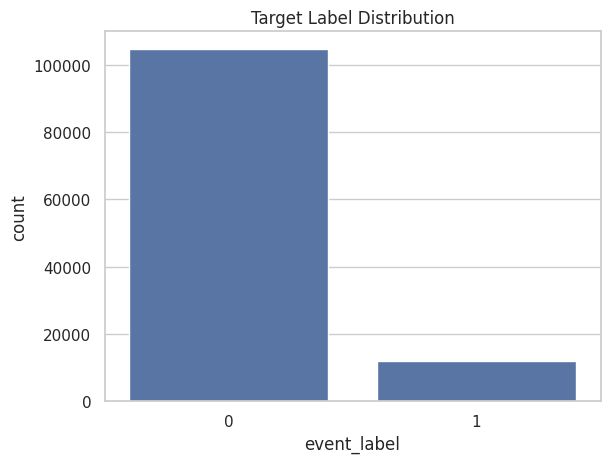

In [6]:
# Target variable distribution here it's event_label
print("\nTarget variable (event_label) distribution:")
print(df['event_label'].value_counts())
sns.countplot(data=df, x='event_label')
plt.title("Target Label Distribution")
plt.show()

In [7]:
#It helps understanding features with too many values and binary values
#Helps in identifying non useful features
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

event_id             116705
event_timestamp      115944
label_timestamp      115944
billing_street        29997
ip_address            29997
billing_phone         29997
entity_id             29996
customer_email        29567
order_price           28604
user_agent            24231
card_bin              23383
billing_zip           19667
billing_longitude     18996
billing_latitude      18322
billing_city          11806
merchant                693
customer_name           690
customer_job            639
payment_currency        164
billing_state            51
product_category         14
event_label               2
entity_type               1
billing_country           1
dtype: int64


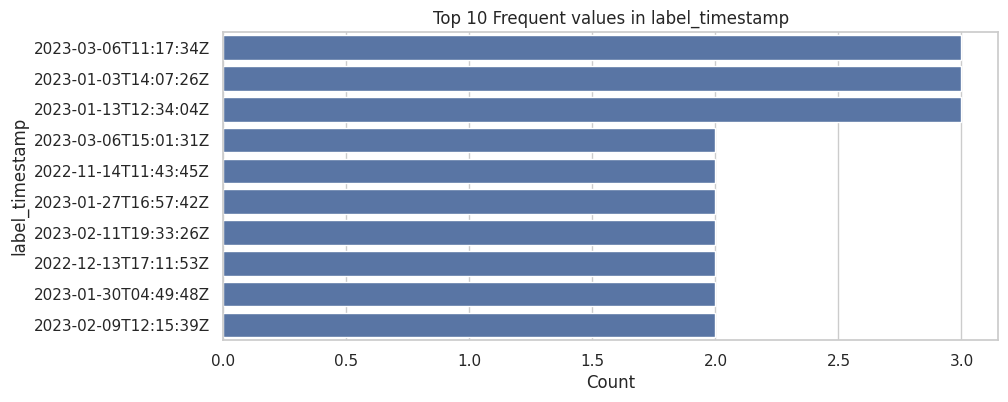

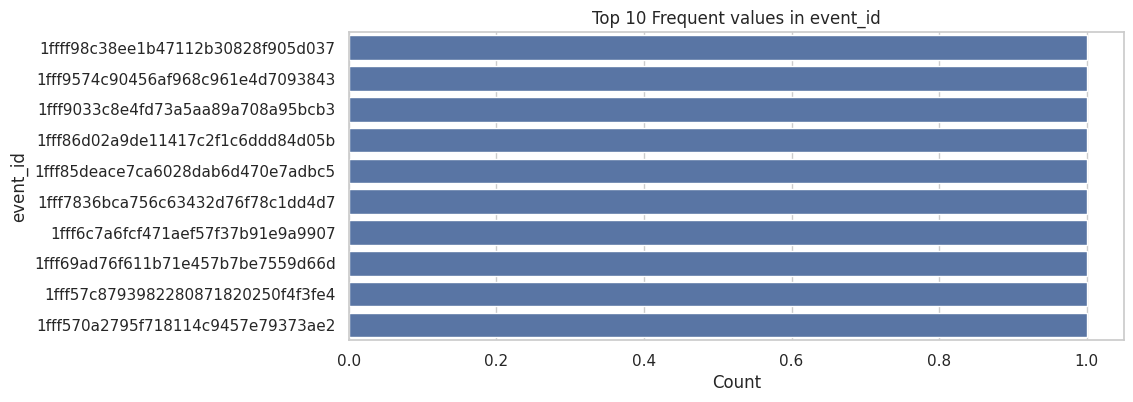

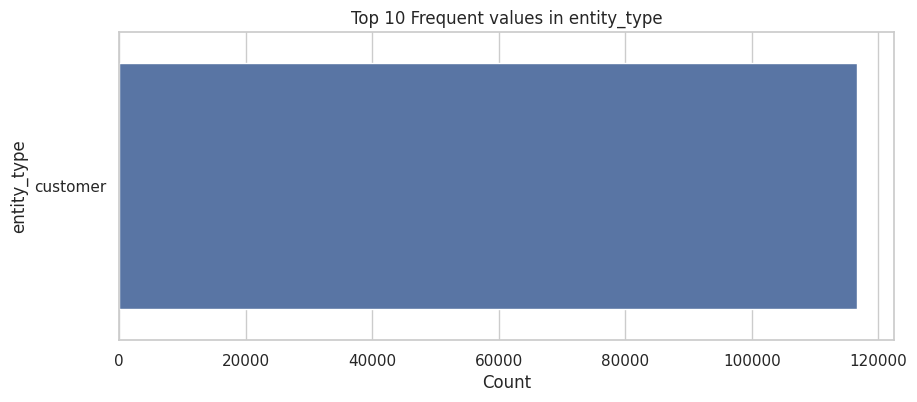

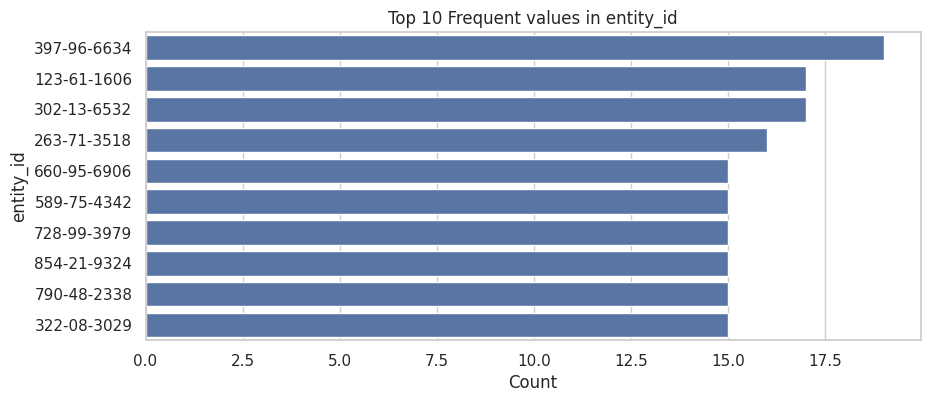

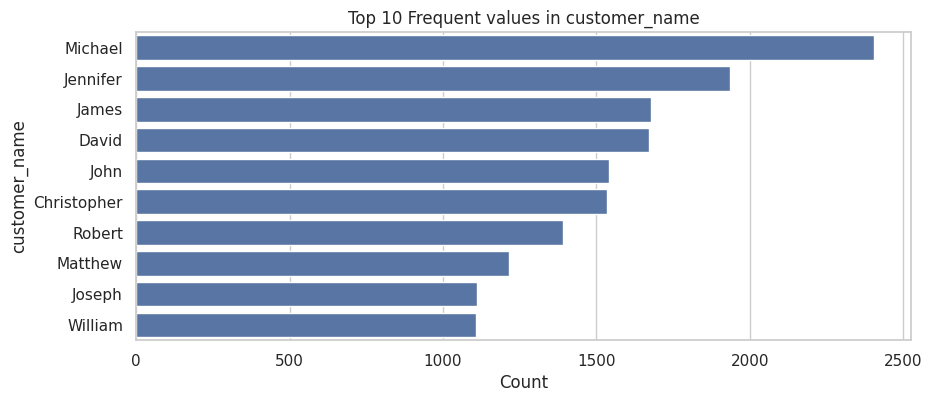

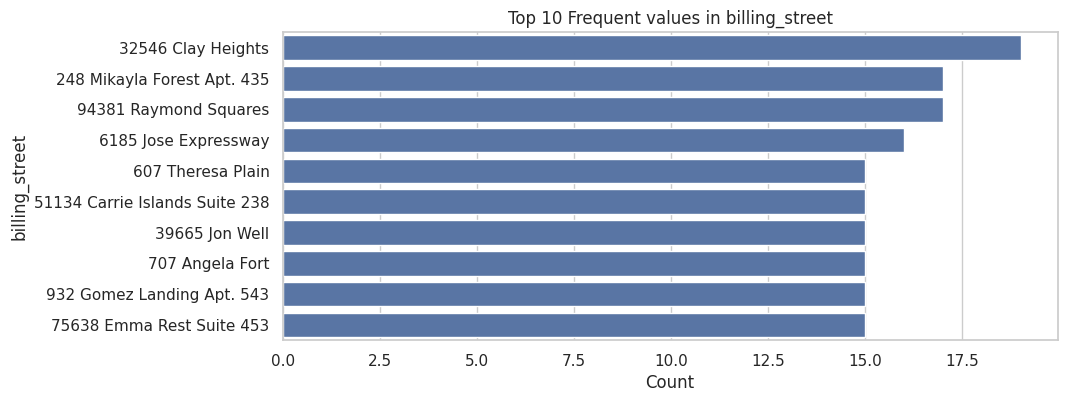

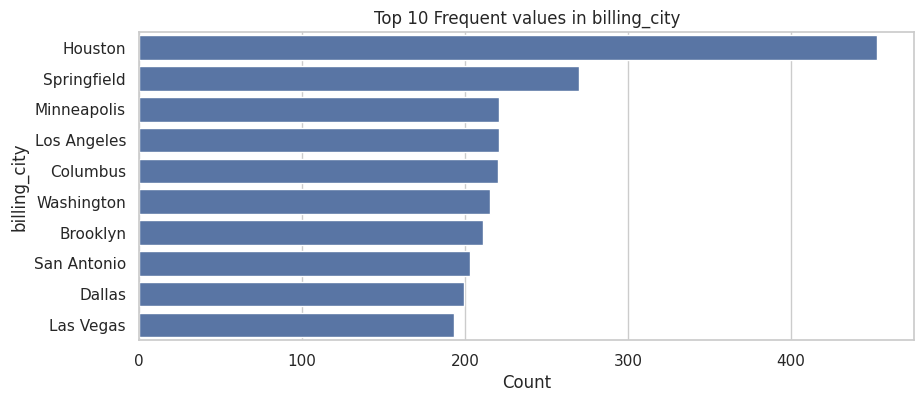

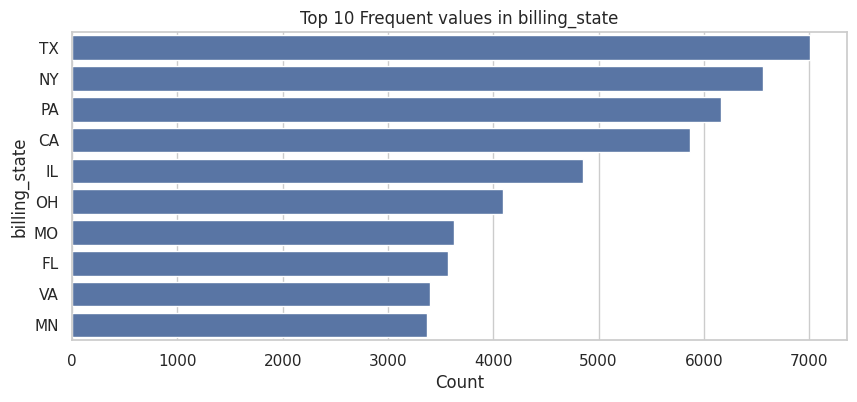

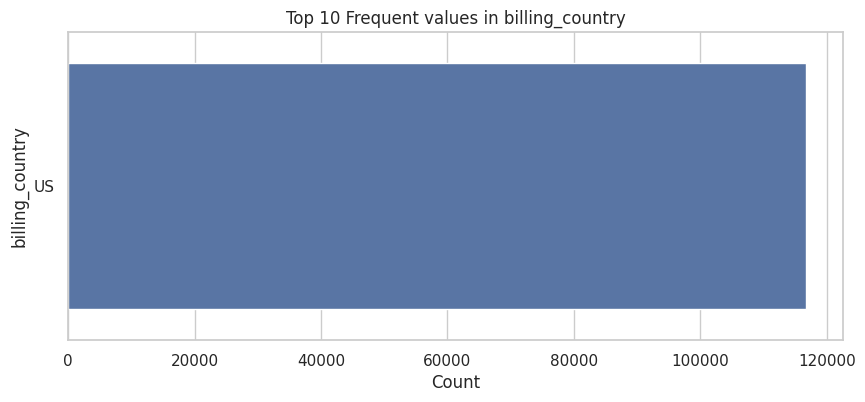

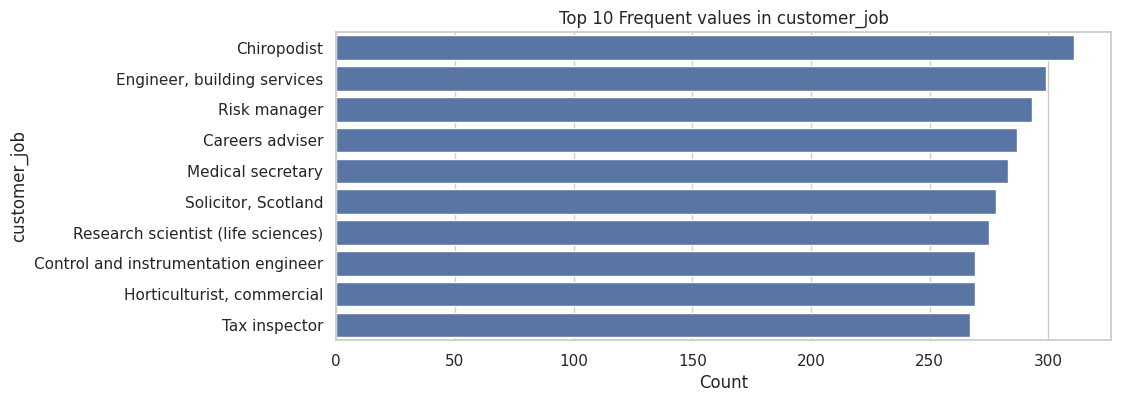

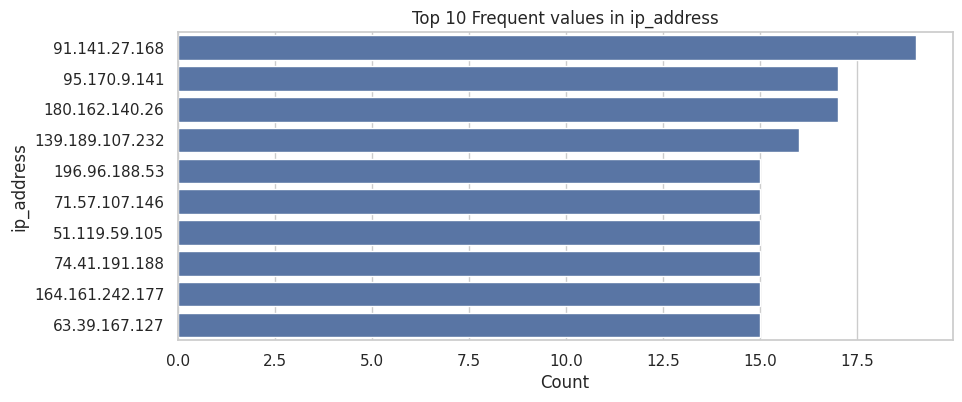

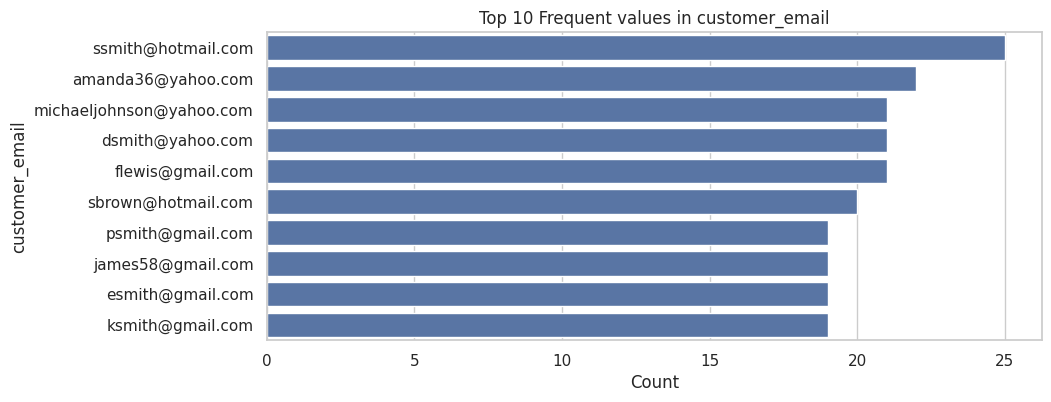

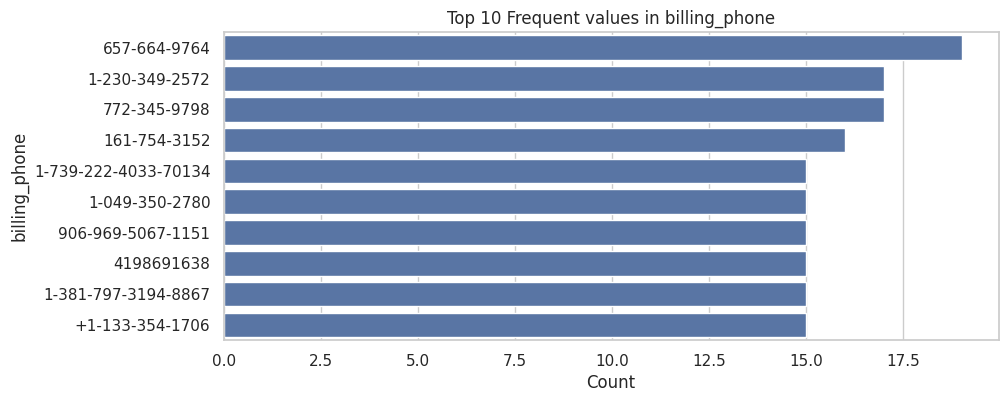

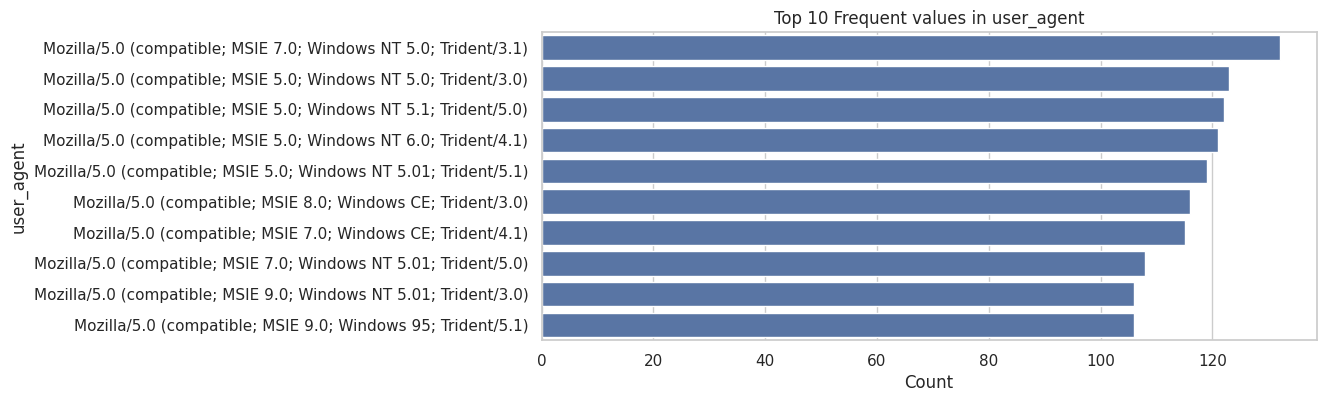

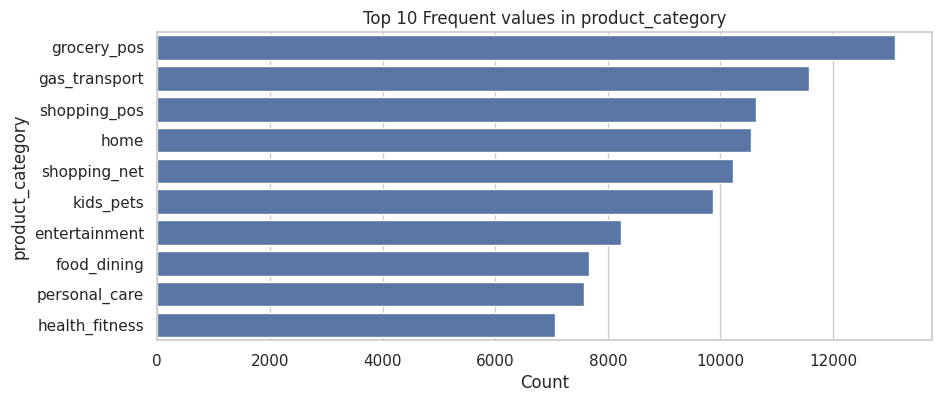

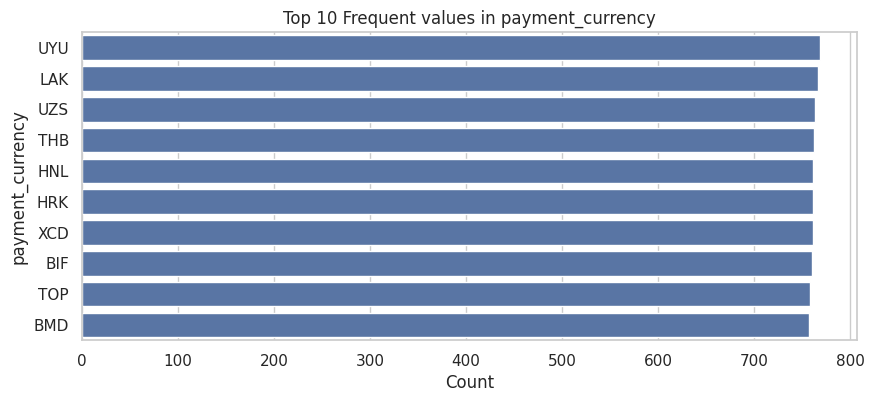

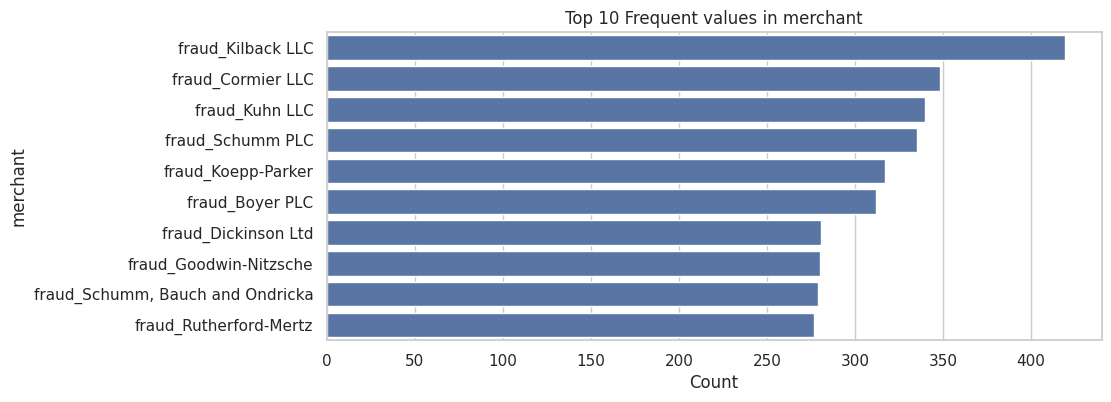

In [8]:
categorical_col = df.select_dtypes(include= 'object').columns.drop(['event_timestamp'])
for col in categorical_col:
  top_vals = df[col].value_counts().nlargest(10)
  plt.figure(figsize=(10,4))
  sns.barplot(x=top_vals.values, y=top_vals.index)
  plt.title(f"Top 10 Frequent values in {col}")
  plt.xlabel("Count")
  plt.ylabel(col)
  plt.show()

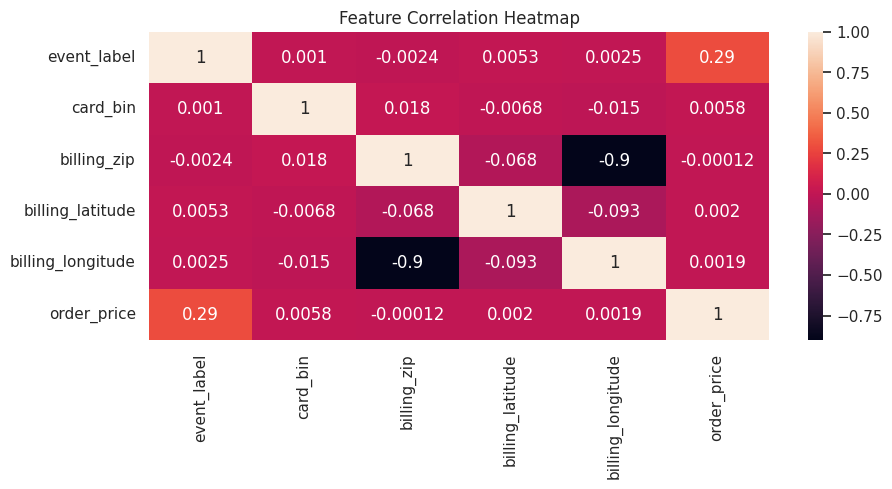

In [9]:
#To determine the correlation between two features, if it's more we remove one feature
plt.figure(figsize=(10,4))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot= True)
plt.title("Feature Correlation Heatmap")
plt.show()

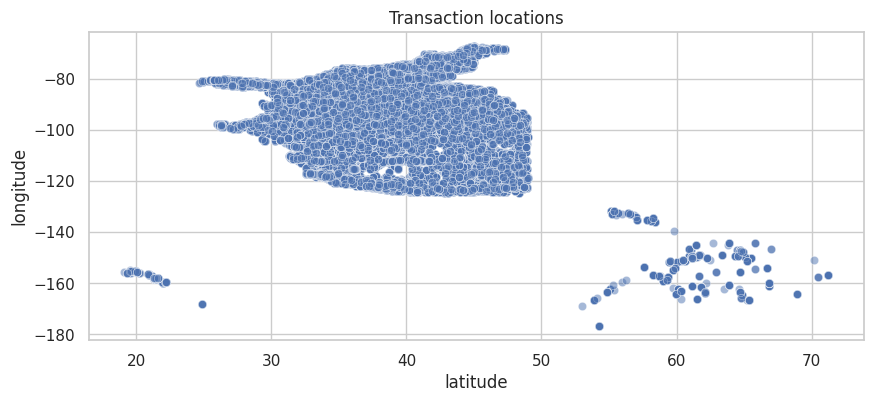

In [10]:
#For Geographical location using coordinates
plt.figure(figsize=(10, 4))
sns.scatterplot(x='billing_latitude', y='billing_longitude', data=df, alpha=0.5)
plt.title("Transaction locations")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

In [11]:
# This here is done to find columns that have high different values

potential_ids = [col for col in df.columns if df[col].nunique() / df.shape[0] > 0.90]
print("Columns with high cardinality")
print(potential_ids)

Columns with high cardinality
['event_timestamp', 'label_timestamp', 'event_id']


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#This part converts categorical variables(sting or object) to integers as ML model only work with numeric values
label_encoders = {}
for col in categorical_col:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))
  label_encoders[col] = le

In [13]:
print(df.dtypes)

event_label            int64
event_timestamp       object
label_timestamp        int64
event_id               int64
entity_type            int64
entity_id              int64
card_bin               int64
customer_name          int64
billing_street         int64
billing_city           int64
billing_state          int64
billing_zip            int64
billing_latitude     float64
billing_longitude    float64
billing_country        int64
customer_job           int64
ip_address             int64
customer_email         int64
billing_phone          int64
user_agent             int64
product_category       int64
order_price          float64
payment_currency       int64
merchant               int64
dtype: object


In [14]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], errors='coerce')

In [21]:
print(df['event_timestamp'].isnull().sum())

df['event_hour'] = df['event_timestamp'].dt.hour                   # 0 to 23
df['event_dayofweek'] = df['event_timestamp'].dt.dayofweek         # 0 = Monday
df['event_day'] = df['event_timestamp'].dt.day                     # 1 to 31
df['event_month'] = df['event_timestamp'].dt.month

0


In [23]:
#This gives you the time (in seconds) between a user’s consecutive transactions, sudden rapid activity can indicate fraud.
#df = df.sort_values(by=['ip_address', 'event_timestamp'])
#df['time_diff'] = df.groupby('ip_address')['event_timestamp'].diff().dt.total_seconds()

In [24]:
df.drop(columns=['event_timestamp'], inplace=True)

In [27]:
print(df.dtypes)

event_label            int64
label_timestamp        int64
event_id               int64
entity_type            int64
entity_id              int64
card_bin               int64
customer_name          int64
billing_street         int64
billing_city           int64
billing_state          int64
billing_zip            int64
billing_latitude     float64
billing_longitude    float64
billing_country        int64
customer_job           int64
ip_address             int64
customer_email         int64
billing_phone          int64
user_agent             int64
product_category       int64
order_price          float64
payment_currency       int64
merchant               int64
event_hour             int32
event_dayofweek        int32
event_day              int32
event_month            int32
time_diff            float64
dtype: object


### BASELINE MODEL

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [31]:
X = df.drop(columns=[
    'event_label', 'event_id', 'entity_id', 'label_timestamp',
    'customer_name', 'customer_email', 'billing_phone', 'ip_address', 'time_diff'
])

y = df['event_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [32]:
baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
baseline_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     20961
           1       0.31      0.42      0.36      2380

    accuracy                           0.84     23341
   macro avg       0.62      0.66      0.63     23341
weighted avg       0.87      0.84      0.85     23341

ROC AUC Score: 0.6966069439082345


In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42),
    "NeuralNet": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

results = {}


In [37]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score for {name}: {auc:.4f}")

    results[name] = auc


Training RandomForest...

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20961
           1       0.52      0.11      0.18      2380

    accuracy                           0.90     23341
   macro avg       0.71      0.55      0.57     23341
weighted avg       0.87      0.90      0.87     23341

ROC AUC Score for RandomForest: 0.8288

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     20961
           1       0.44      0.41      0.43      2380

    accuracy                           0.89     23341
   macro avg       0.69      0.68      0.68     23341
weighted avg       0.88      0.89      0.89     23341

ROC AUC Score for XGBoost: 0.8329

Training NeuralNet...

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20961
           1       0.00      0.00      0.00      2380

    accuracy                           0.90     23341
   macro avg       0.45      0.50      0.47     23341
weighted avg       0.81      0.90      0.85     23341

ROC AUC Score for NeuralNet: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


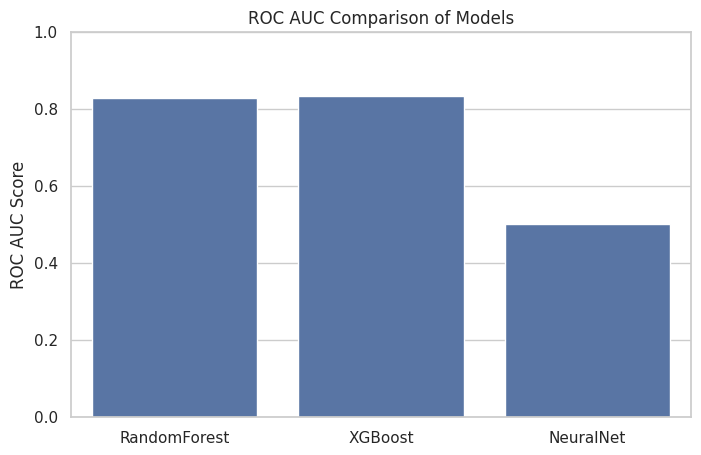

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("ROC AUC Comparison of Models")
plt.ylabel("ROC AUC Score")
plt.ylim(0.0, 1.0)
plt.show()

### Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

In [40]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

print("🔍 Tuning Random Forest...")
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
print("✅ Best Random Forest AUC:", roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))


🔍 Tuning Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Random Forest AUC: 0.8329983775390792


In [ ]:
xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'scale_pos_weight': [3, 5, 10]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params,
    scoring='roc_auc',
    n_iter=25,
    cv=3,
    verbose=1,
    n_jobs=-1
)

print("🔍 Tuning XGBoost...")
xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_
print("✅ Best XGBoost AUC:", roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1]))
